In [1]:
using Distributions, StatsPlots, Random, Base.Threads, KernelDensity
default(fmt=:png, titlefontsize=10, plot_titlefontsize=10,
    guidefontsize=9, legendfontsize=9, tickfontsize=7)

function marginalplot(X, Y; m=10^4, qx=(0, 1), qy=(0, 1), kwargs...)
    ikx = InterpKDE(kde(X))
    iky = InterpKDE(kde(Y))
    ikxy = InterpKDE(kde((X, Y)))
    f(x) = pdf(ikx, x)
    g(y) = pdf(iky, y)
    h(x, y) = pdf(ikxy, x, y)
    xlim = quantile.(Ref(X), qx)
    ylim = quantile.(Ref(Y), qy)
    x, y = X[1:m], Y[1:m]
    PXY = scatter(x, y; ms=3, ma=0.2, msw=0, label="",
        marker_z=h, colorbar=false, xlim, ylim)
    PX = plot(f, xlim...;
        norm=true, label="", ytick=0:0, xlim)
    PY = plot(g, ylim...;
        norm=true, label="", ytick=0:0, xlim=ylim, permute=(:x, :y))
    PE = plot(; framestyle=:none)
    plot(PX, PE, PXY, PY; layout=@layout[a{0.2h} b; c d{0.2w}],
        size=(500, 500))
    plot!(; kwargs...)
end

function sample_meansvars(dist, n; L=10^5)
    X̄ = zeros(L)
    S² = zeros(L)
    tmp = [zeros(eltype(dist), n) for _ in 1:nthreads()]
    @threads for i in 1:L
        X = rand!(dist, tmp[threadid()])
        X̄[i] = mean(X)
        S²[i] = var(X)
    end
    (; X̄, S²)
end

function plot_Z_and_χ²(dist, n; L=10^5,
        plot_title=replace(string(dist), r"{[^\}]*}"=>"") * ", n=$n",
        size=(500, 510), 
        kwargs...)
    (; X̄, S²) = sample_meansvars(dist, n; L)
    μ, σ = mean(dist), std(dist)
    Z = @. √n * (X̄ - μ)/σ
    χ² = @. (n-1)*S²/σ^2
    marginalplot(Z, χ²; plot_title, size, kwargs...)
end

plot_Z_and_χ² (generic function with 1 method)

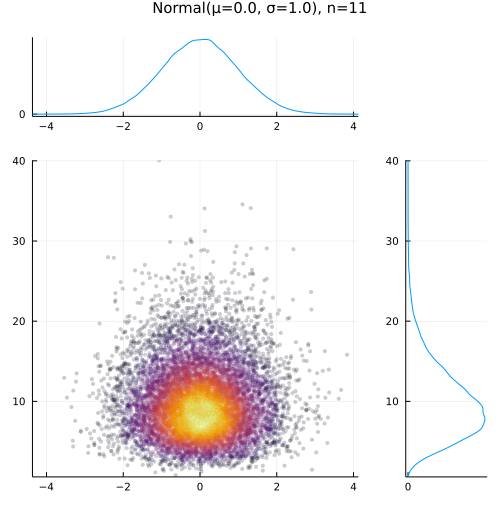

In [2]:
plot_Z_and_χ²(Normal(), 11)

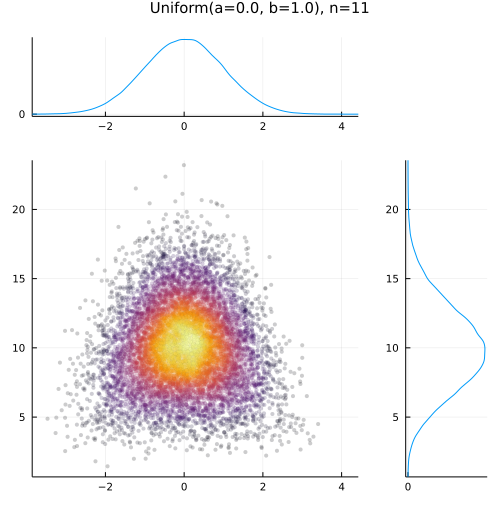

In [3]:
plot_Z_and_χ²(Uniform(), 11)

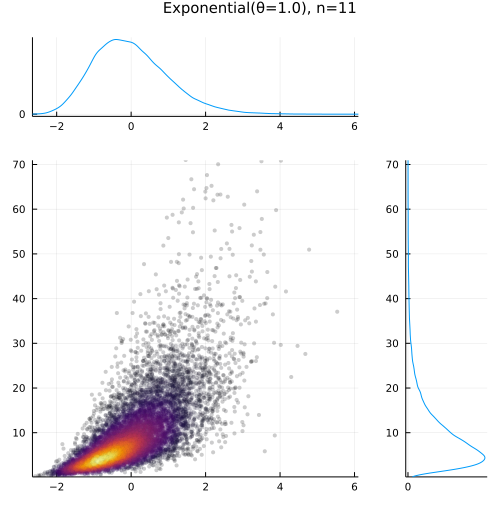

In [4]:
plot_Z_and_χ²(Exponential(), 11; qy=(0, 0.999))

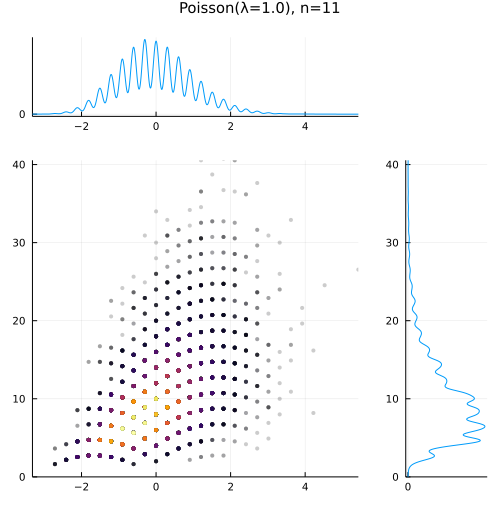

In [5]:
plot_Z_and_χ²(Poisson(), 11; qy=(0, 0.999))

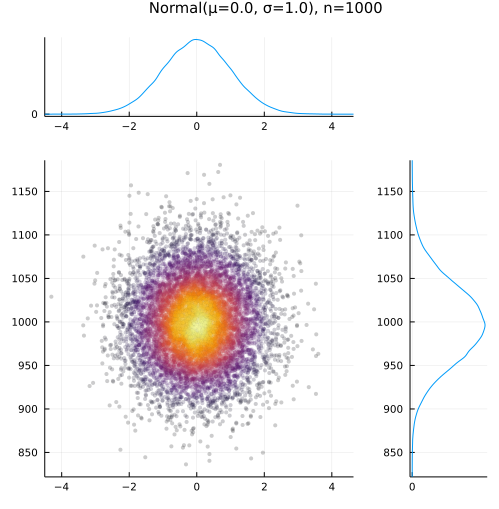

In [6]:
plot_Z_and_χ²(Normal(), 1000)

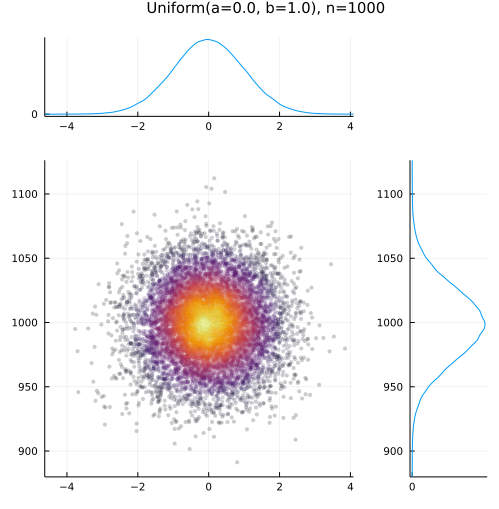

In [7]:
plot_Z_and_χ²(Uniform(), 1000)

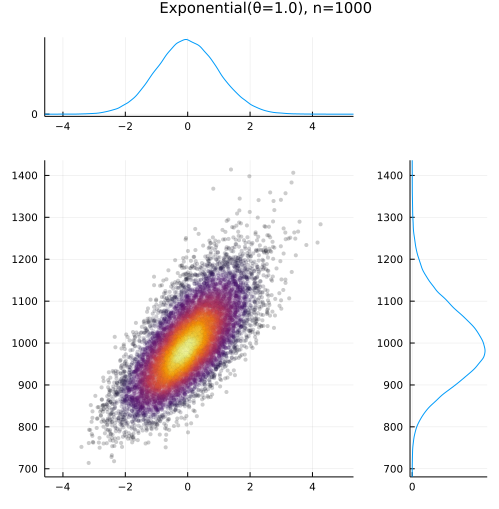

In [8]:
plot_Z_and_χ²(Exponential(), 1000)

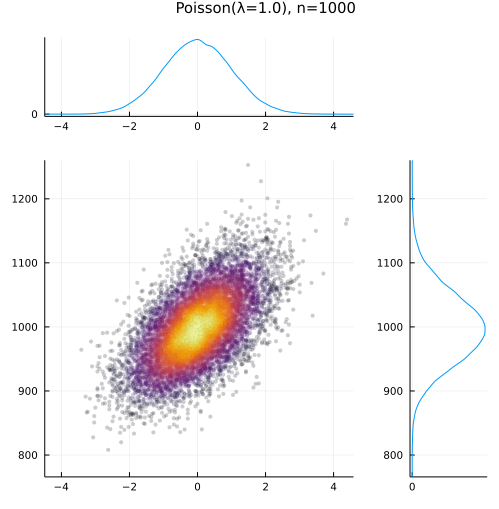

In [9]:
plot_Z_and_χ²(Poisson(), 1000)